In [77]:
from datasets import load_dataset
import datasets
from typing import Dict, Any

SEED = 42

In [ ]:
dataset = load_dataset("allenai/qasper")

In [5]:
display(dataset['train'][0])

{'id': '1909.00694',
 'title': 'Minimally Supervised Learning of Affective Events Using Discourse Relations',
 'abstract': 'Recognizing affective events that trigger positive or negative sentiment has a wide range of natural language processing applications but remains a challenging problem mainly because the polarity of an event is not necessarily predictable from its constituent words. In this paper, we propose to propagate affective polarity using discourse relations. Our method is simple and only requires a very small seed lexicon and a large raw corpus. Our experiments using Japanese data show that our method learns affective events effectively without manually labeled data. It also improves supervised learning results when labeled data are small.',
 'full_text': {'section_name': ['Introduction',
   'Related Work',
   'Proposed Method',
   'Proposed Method ::: Polarity Function',
   'Proposed Method ::: Discourse Relation-Based Event Pairs',
   'Proposed Method ::: Discourse Relat

## TRAIN SET

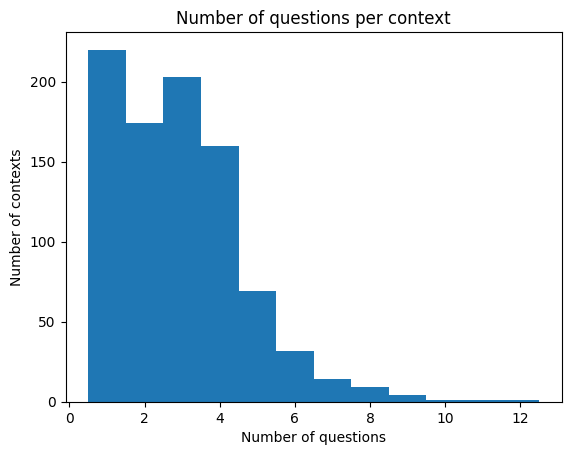

In [20]:
# draw bar plot of the number of questions
import matplotlib.pyplot as plt

num_questions = [len(dataset['train'][i]['qas']['question']) for i in range(len(dataset['train']))]
plt.hist(num_questions, bins=12, range=(0.5, 12.5))
plt.title('Number of questions per article')
plt.xlabel('Number of questions')
plt.ylabel('Number of article')
plt.show()


Number of answers:  2675
Number of free form answers:  622
Number of extractive answers:  1363
Number of unanswerable questions:  281
Average number of answers per question:  1.031623602005399


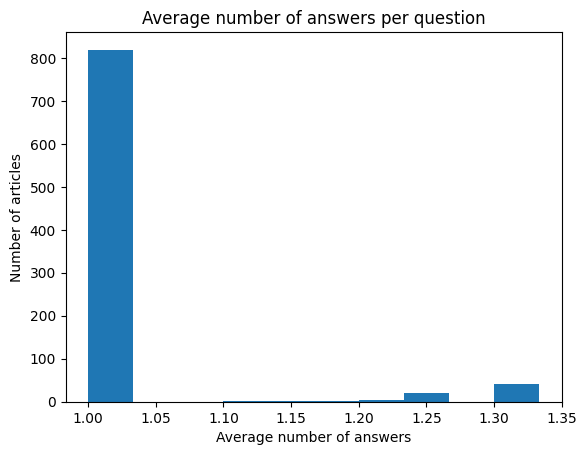

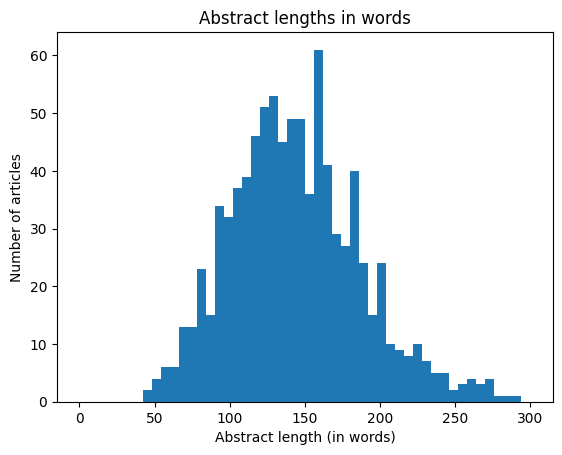

In [45]:
# draw histogram of average number of answers per question
num_avgs = []
all_answer_counts = []
num_free_form_answers = 0
num_extractive_answers = 0
num_unanswerable = 0
abstract_lengths = []
for article in dataset['train']:
    abstract_lengths.append(len(article['abstract'].split(' ')))
    for answers in article['qas']['answers']:
        for answer_dict in answers['answer']:
            if answer_dict['free_form_answer'] != '':
                num_free_form_answers += 1
            if len(answer_dict['extractive_spans']) != 0:
                num_extractive_answers += 1
            if answer_dict['unanswerable'] == True:
                num_unanswerable += 1
    answer_counts = [len(answers['answer']) for answers in article['qas']['answers']]
    num_avgs.append(sum(answer_counts) / len(answer_counts))
    all_answer_counts.extend(answer_counts)

print('Number of answers: ', sum(all_answer_counts))
print('Number of free form answers: ', num_free_form_answers)
print('Number of extractive answers: ', num_extractive_answers)
print('Number of unanswerable questions: ', num_unanswerable)
print('Average number of answers per question: ', sum(all_answer_counts) / len(all_answer_counts))
plt.hist(num_avgs)
plt.title('Average number of answers per question')
plt.xlabel('Average number of answers')
plt.ylabel('Number of articles')
plt.show()

# draw histogram of abstract lengths
plt.hist(abstract_lengths, bins=50, range=(0, 300))
plt.title('Abstract lengths in words')
plt.xlabel('Abstract length (in words)')
plt.ylabel('Number of articles')
plt.show()

## TEST SET

Number of questions in test set:  1451


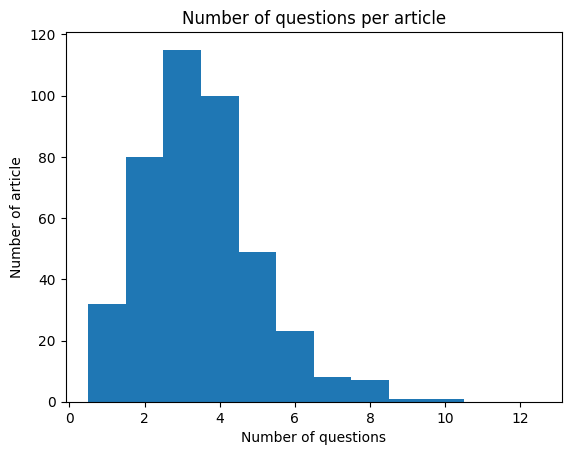

In [76]:
num_questions = [len(dataset['test'][i]['qas']['question']) for i in range(len(dataset['test']))]
print('Number of questions in test set: ', sum(num_questions)) 
plt.hist(num_questions, bins=12, range=(0.5, 12.5))
plt.title('Number of questions per article')
plt.xlabel('Number of questions')
plt.ylabel('Number of article')
plt.show()


Number of answers:  3554
Number of free form answers:  878
Number of extractive answers:  1817
Number of unanswerable questions:  366
Average number of answers per question:  2.44934527911785


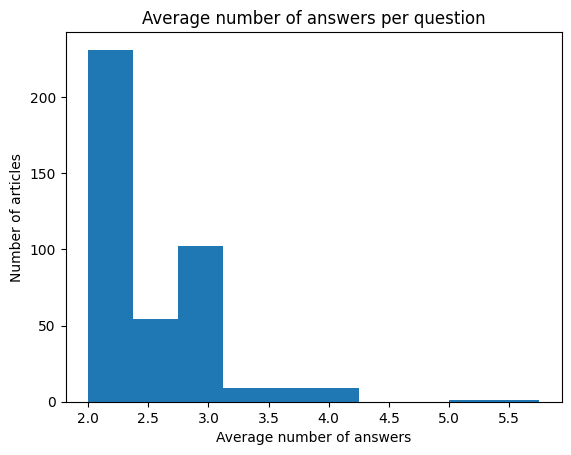

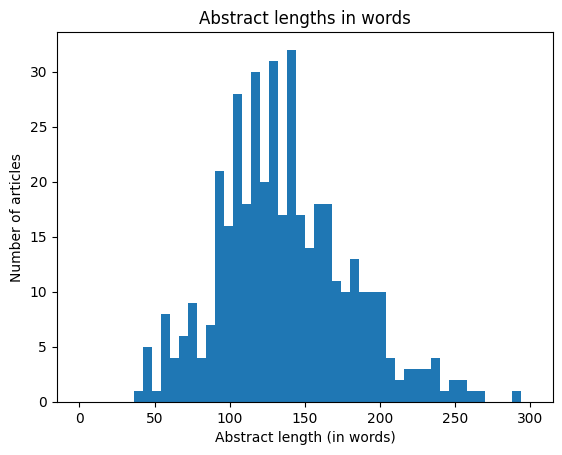

In [49]:
# draw histogram of average number of answers per question
num_avgs = []
all_answer_counts = []
num_free_form_answers = 0
num_extractive_answers = 0
num_unanswerable = 0
abstract_lengths = []
for article in dataset['test']:
    abstract_lengths.append(len(article['abstract'].split(' ')))
    for answers in article['qas']['answers']:
        for answer_dict in answers['answer']:
            if answer_dict['free_form_answer'] != '':
                num_free_form_answers += 1
            if len(answer_dict['extractive_spans']) != 0:
                num_extractive_answers += 1
            if answer_dict['unanswerable'] == True:
                num_unanswerable += 1
    answer_counts = [len(answers['answer']) for answers in article['qas']['answers']]
    num_avgs.append(sum(answer_counts) / len(answer_counts))
    all_answer_counts.extend(answer_counts)

print('Number of answers: ', sum(all_answer_counts))
print('Number of free form answers: ', num_free_form_answers)
print('Number of extractive answers: ', num_extractive_answers)
print('Number of unanswerable questions: ', num_unanswerable)
print('Average number of answers per question: ', sum(all_answer_counts) / len(all_answer_counts))
plt.hist(num_avgs)
plt.title('Average number of answers per question')
plt.xlabel('Average number of answers')
plt.ylabel('Number of articles')
plt.show()

# draw histogram of abstract lengths
plt.hist(abstract_lengths, bins=50, range=(0, 300))
plt.title('Abstract lengths in words')
plt.xlabel('Abstract length (in words)')
plt.ylabel('Number of articles')
plt.show()

## FLATTENING

In [55]:
import random

In [57]:
a = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
random.shuffle(a)
print(a)

['i', 'a', 'f', 'b', 'j', 'd', 'e', 'g', 'h', 'c']


In [67]:
# train_sample = {
#     'question': xxx,
#     'context': xxx,
#     'answer': xxx (randomly selected of the possible answers)
# }

train_samples = []
for article in dataset['train']:
    for i, question in enumerate(article['qas']['question']):
        answers = article['qas']['answers'][i]['answer']
        # shuffle answers
        random.shuffle(answers)
        for answer_dict in answers:
            if answer_dict['free_form_answer'] != '':
                train_samples.append({
                    'question': question,
                    'context': article['abstract'],
                    'answer': answer_dict['free_form_answer']
                })
                break
            elif len(answer_dict['extractive_spans']) != 0:
                train_samples.append({
                    'question': question,
                    'context': article['abstract'],
                    'answer': answer_dict['extractive_spans'][0]
                })
                break

display(train_samples[0])

test_samples = []
for article in dataset['test']:
    for i, question in enumerate(article['qas']['question']):
        answers = article['qas']['answers'][i]['answer']
        # shuffle answers
        random.shuffle(answers)
        for answer_dict in answers:
            if answer_dict['free_form_answer'] != '':
                test_samples.append({
                    'question': question,
                    'context': article['abstract'],
                    'answer': answer_dict['free_form_answer']
                })
                break
            elif len(answer_dict['extractive_spans']) != 0:
                test_samples.append({
                    'question': question,
                    'context': article['abstract'],
                    'answer': answer_dict['extractive_spans'][0]
                })
                break

display(test_samples[0])

train_abstracts = [sample['context'] for sample in train_samples]
train_questions = [sample['question'] for sample in train_samples]
train_answers = [sample['answer'] for sample in train_samples]

test_abstracts = [sample['context'] for sample in test_samples]
test_questions = [sample['question'] for sample in test_samples]
test_answers = [sample['answer'] for sample in test_samples]

train = {'abstract': train_abstracts, 'question': train_questions, 'answer': train_answers}
test = {'abstract': test_abstracts, 'question': test_questions, 'answer': test_answers}

{'question': 'What is the seed lexicon?',
 'context': 'Recognizing affective events that trigger positive or negative sentiment has a wide range of natural language processing applications but remains a challenging problem mainly because the polarity of an event is not necessarily predictable from its constituent words. In this paper, we propose to propagate affective polarity using discourse relations. Our method is simple and only requires a very small seed lexicon and a large raw corpus. Our experiments using Japanese data show that our method learns affective events effectively without manually labeled data. It also improves supervised learning results when labeled data are small.',
 'answer': 'a vocabulary of positive and negative predicates that helps determine the polarity score of an event'}

{'question': 'How big is the ANTISCAM dataset? ',
 'context': 'End-to-end task-oriented dialog models have achieved promising performance on collaborative tasks where users willingly coordinate with the system to complete a given task. While in non-collaborative settings, for example, negotiation and persuasion, users and systems do not share a common goal. As a result, compared to collaborate tasks, people use social content to build rapport and trust in these non-collaborative settings in order to advance their goals. To handle social content, we introduce a hierarchical intent annotation scheme, which can be generalized to different non-collaborative dialog tasks. Building upon TransferTransfo (Wolf et al. 2019), we propose an end-to-end neural network model to generate diverse coherent responses. Our model utilizes intent and semantic slots as the intermediate sentence representation to guide the generation process. In addition, we design a filter to select appropriate responses ba

In [72]:
train_dataset = datasets.Dataset.from_dict(train)
test_dataset = datasets.Dataset.from_dict(test)

flattened_dataset = datasets.DatasetDict({'train': train_dataset, 'test': test_dataset})

assert len(train_abstracts) == len(train_questions) == len(train_answers)
assert len(test_abstracts) == len(test_questions) == len(test_answers)

display(flattened_dataset['train'][0])

{'abstract': 'Recognizing affective events that trigger positive or negative sentiment has a wide range of natural language processing applications but remains a challenging problem mainly because the polarity of an event is not necessarily predictable from its constituent words. In this paper, we propose to propagate affective polarity using discourse relations. Our method is simple and only requires a very small seed lexicon and a large raw corpus. Our experiments using Japanese data show that our method learns affective events effectively without manually labeled data. It also improves supervised learning results when labeled data are small.',
 'question': 'What is the seed lexicon?',
 'answer': 'a vocabulary of positive and negative predicates that helps determine the polarity score of an event'}

In [75]:
# randomly choose 10% of the training data as validation data from flattened dataset
temp = flattened_dataset["train"].train_test_split(test_size=0.1, shuffle=True, seed=SEED)
flattened_dataset["train"] = temp["train"]
flattened_dataset["val"] = temp["test"]

display(flattened_dataset)

DatasetDict({
    train: Dataset({
        features: ['abstract', 'question', 'answer'],
        num_rows: 1559
    })
    test: Dataset({
        features: ['abstract', 'question', 'answer'],
        num_rows: 1167
    })
    val: Dataset({
        features: ['abstract', 'question', 'answer'],
        num_rows: 174
    })
})

In [167]:
from transformers import AutoTokenizer
import torch

# Notice that since we are working with an encoder-decoder model here, you need to tokenize, truncate and pad the input sequence, i.e., question: {question} context: {abstract}, as well as the output sequence, i.e., answer.

tokenizer = AutoTokenizer.from_pretrained("t5-base")

def preprocess_function(sample: Dict, max_qc_len: int, max_ans_len: int):
    """
    Preprocesses a single sample dictionary, each containing:
        'question': question,
        'abstract': article['abstract'],
        'answer': answer

    Tokenizes the question and context, and truncates the concatenation to max_qc_len.
    Tokenizes the answer and truncates to max_ans_len.
    """

    # Tokenize the question and context pair
    qc_pair = tokenizer(
        sample["question"],
        sample["abstract"],
        max_length=max_qc_len,
        truncation=True,
        padding="max_length",
    )

    # Tokenize the answer
    ans = tokenizer(
        sample["answer"],
        max_length=max_ans_len,
        truncation=True,
        padding="max_length",
    )

    return {
        "input_ids": qc_pair.input_ids,
        "attention_mask": qc_pair.attention_mask,
        "labels": ans.input_ids,
        "decoder_attention_mask": ans.attention_mask,
    }
    

/home/jerome/anaconda3/envs/umlia23/lib/python3.9/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [103]:
encoded_ds = flattened_dataset.map(
    preprocess_function,
    batched=True,
    fn_kwargs={"max_qc_len": 128, "max_ans_len": 32},
)

Map:   0%|          | 0/1559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1167 [00:00<?, ? examples/s]

Map:   0%|          | 0/174 [00:00<?, ? examples/s]

In [150]:
# load google/t5-efficient-mini
from transformers import T5ForConditionalGeneration
model = T5ForConditionalGeneration.from_pretrained("google/t5-efficient-mini")

In [151]:
import wandb
import os
# set the wandb project where this run will be logged
os.environ["WANDB_PROJECT"]="my-awesome-project"

# save your trained model checkpoint to wandb
os.environ["WANDB_LOG_MODEL"]="true"

# turn off watch to log faster
os.environ["WANDB_WATCH"]="false"

from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    learning_rate=5e-4,
    weight_decay=0.001,
    # prediction_loss_only=True,
    lr_scheduler_type="cosine",
    output_dir="./results_scratch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    seed=SEED,
    num_train_epochs=5,
    logging_dir='./logs',
    report_to="wandb",
    logging_steps=10,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=encoded_ds['train'],
    eval_dataset=encoded_ds['val'],
)

In [152]:
# start wandb run
wandb.init()

trainer.train()

trainer.evaluate()

# end wandb run
wandb.finish()

eval/loss,█▅▃▃▃▃▄▁▄▁
eval/runtime,▁▃▃▆▂▄▄▂█▅
eval/samples_per_second,█▆▆▃▇▅▅▇▁▄
eval/steps_per_second,█▆▆▃▇▅▅▇▁▄
train/epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇▇██▁▂▂▂▃▃▃▄▁▁▂▂▂▃▃▃▄▄▄
train/global_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇▇██▁▂▂▂▃▃▃▄▁▁▂▂▂▃▃▃▄▄▄
train/learning_rate,▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁████▇▇▇▆▆████▇▇▆▆▅▅▄
train/loss,█▃▄▄▂▃▂▂▃▂▃▃▄▄▃▂▃▃▃▂▃▃▄▂▂▂▂▁▂▃▂▄▃▁▂▂▁▁▁▂
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/jerome/anaconda3/envs/umlia23/lib/python3.9/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.227700,2.478909
2,1.584600,2.375520
3,2.911500,2.318776
4,2.124900,2.317183
5,2.536100,2.332911


eval/loss,█▄▁▁▂▁
eval/runtime,█▄▁▁▂▁
eval/samples_per_second,▁▅██▇▇
eval/steps_per_second,▁▅██▇▇
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/learning_rate,███████▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▆▃▆▆▃█▅▂▃▄▂▃▂▂▂▄▁▄▂▄▃▃▂▂▃▂▃▄▃▂▁▂▃▂▅▃▂▄▁
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁


In [199]:
# run inference on a sample from the test split of flattened dataset
sample = flattened_dataset['test'][9]

# preprocess the sample
preprocessed_sample = preprocess_function(sample, max_qc_len=128, max_ans_len=32)

# move the sample to the device (GPU, if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# run inference
# model_base = T5ForConditionalGeneration.from_pretrained("google/t5-efficient-mini")
# model_base.to(device)
generated_answer_ids = model.generate(
    input_ids=torch.tensor([preprocessed_sample['input_ids']]).to(device),
    attention_mask=torch.tensor([preprocessed_sample['attention_mask']]).to(device),
)

# decode the generated answer ids
generated_answer = tokenizer.decode(generated_answer_ids[0], skip_special_tokens=True)

print("Question:", sample['question'])
print("Context:", sample['abstract'])
print("Generated Answer:", generated_answer)
print("Actual Answer:", sample['answer'])

Question: What languages do they evaluate their methods on?
Context: Rumour detection is hard because the most accurate systems operate retrospectively, only recognising rumours once they have collected repeated signals. By then the rumours might have already spread and caused harm. We introduce a new category of features based on novelty, tailored to detect rumours early on. To compensate for the absence of repeated signals, we make use of news wire as an additional data source. Unconfirmed (novel) information with respect to the news articles is considered as an indication of rumours. Additionally we introduce pseudo feedback, which assumes that documents that are similar to previous rumours, are more likely to also be a rumour. Comparison with other real-time approaches shows that novelty based features in conjunction with pseudo feedback perform significantly better, when detecting rumours instantly after their publication.
Generated Answer: English
Actual Answer: Chinese


/home/jerome/anaconda3/envs/umlia23/lib/python3.9/site-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
